<a href="https://colab.research.google.com/github/ATANU0023/spam_comment_detection/blob/main/spamComment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, preprocessing, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#  Load and preprocess the data

In [5]:

data = pd.read_csv('/content/Youtube-Spam-Dataset.csv')  # Load your dataset
comments = data['CONTENT']  # Use the 'CONTENT' column as input
labels = data['CLASS']  # Use the 'CLASS' column as labels

#  Tokenize and pad the sequences (for comments)

In [6]:

tokenizer = preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)
padded_sequences = preprocessing.sequence.pad_sequences(sequences, padding='post', maxlen=100)

#  Encode the labels (assuming 'CLASS' is binary; 0 for non-spam, 1 for spam)

In [7]:

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

#  Train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

#  Build the model

In [9]:

model = Sequential([
    layers.Embedding(input_dim=5000, output_dim=32, input_length=100),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification (spam or not spam)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#  Compile the model

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#  Train the model

In [11]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6291 - loss: 0.6567 - val_accuracy: 0.8699 - val_loss: 0.3634
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8915 - loss: 0.2891 - val_accuracy: 0.9362 - val_loss: 0.1607
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9617 - loss: 0.1168 - val_accuracy: 0.9515 - val_loss: 0.1312
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9842 - loss: 0.0604 - val_accuracy: 0.9541 - val_loss: 0.1309
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9921 - loss: 0.0378 - val_accuracy: 0.9439 - val_loss: 0.1438
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9955 - loss: 0.0213 - val_accuracy: 0.9464 - val_loss: 0.1580
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9995 - loss: 0.0075 - val_accuracy: 0.9464 - val_loss: 0.1593
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9998 - loss: 0.0056 - val_accuracy: 0.9515 - v

#  Evaluate the model


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9420 - loss: 0.1997
Test Accuracy: 0.9464285969734192


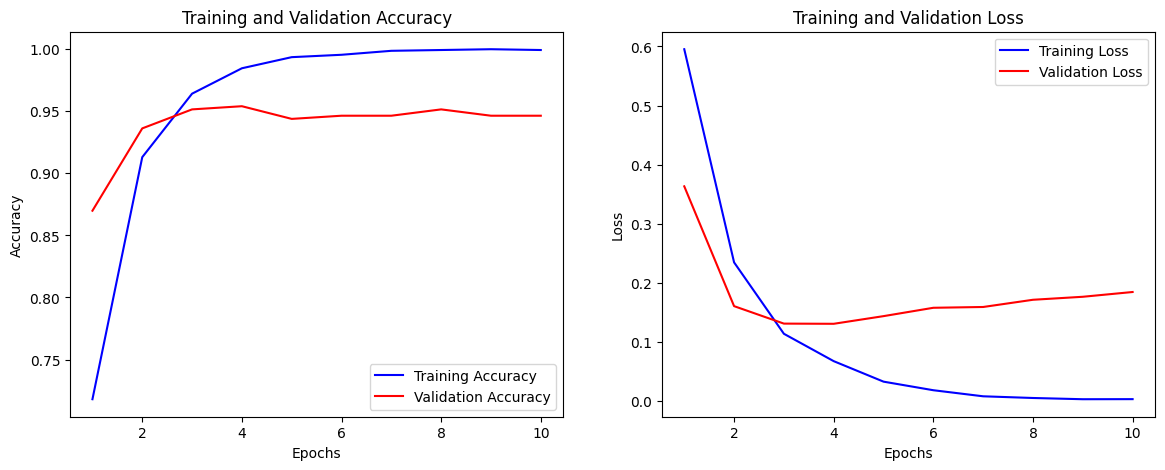

In [20]:

# Plot training & validation accuracy and loss
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Accuracy Plot
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function after model training
plot_accuracy_and_loss(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


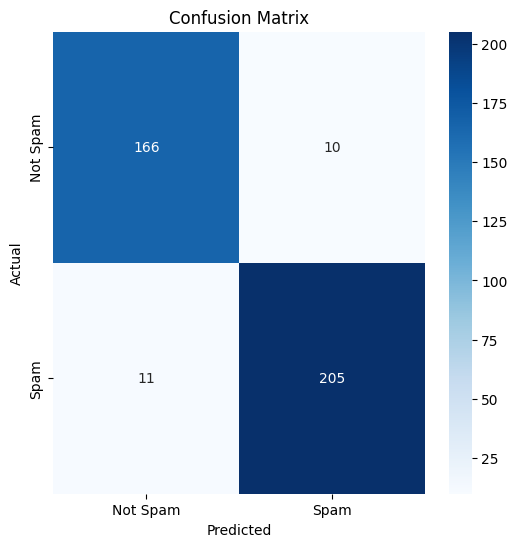

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the values for the test dataset
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


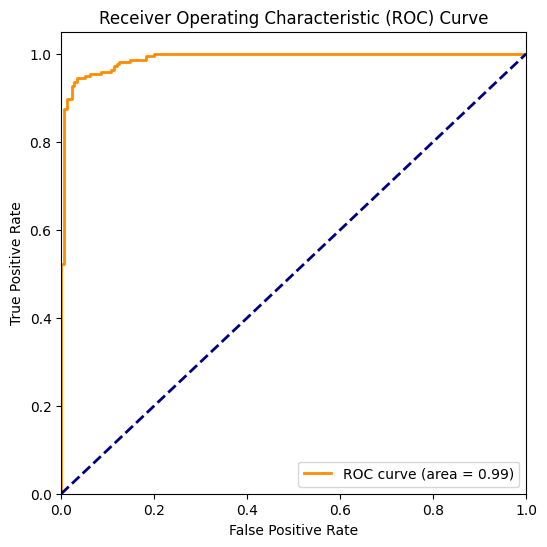

In [22]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_pred_prob = model.predict(X_test).ravel()

# Compute ROC curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


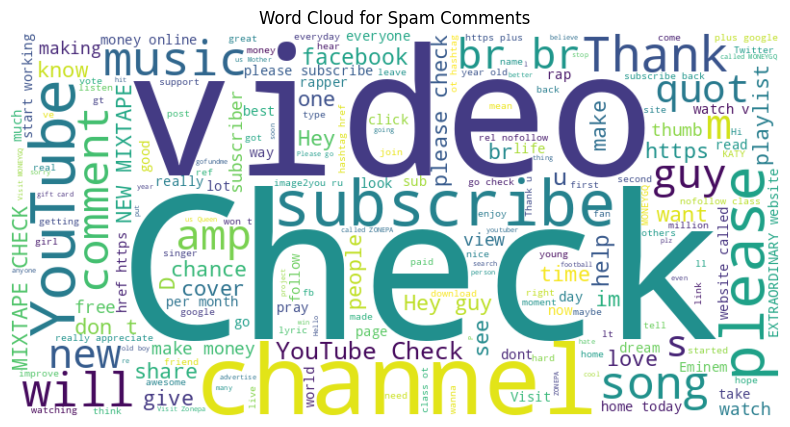

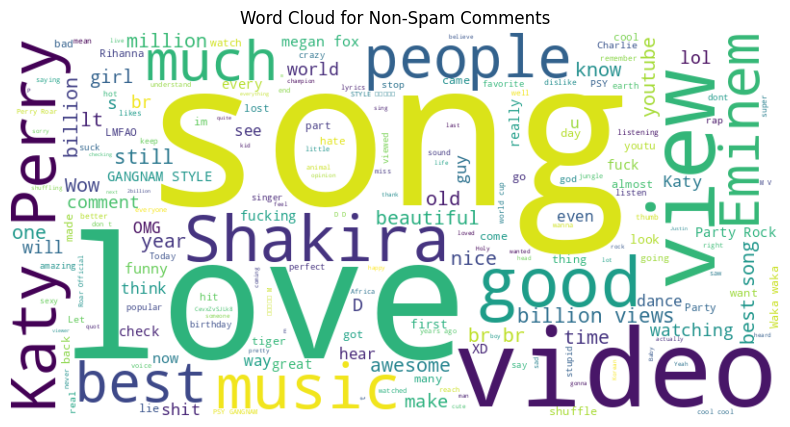

In [23]:
from wordcloud import WordCloud

# Separate spam and non-spam comments
spam_comments = ' '.join(data[data['CLASS'] == 1]['CONTENT'])
non_spam_comments = ' '.join(data[data['CLASS'] == 0]['CONTENT'])

# Generate word cloud for spam comments
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(spam_comments)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam Comments')
plt.axis('off')
plt.show()

# Generate word cloud for non-spam comments
non_spam_wc = WordCloud(width=800, height=400, background_color='white').generate(non_spam_comments)
plt.figure(figsize=(10, 5))
plt.imshow(non_spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Comments')
plt.axis('off')
plt.show()


In [27]:

# 9. Add an input section for spam detection
while True:
    # Accept a comment input from the user
    user_comment = input("\nEnter a comment to check (or type 'exit' to quit): ")

    # Check if the user wants to exit
    if user_comment.lower() == 'exit':
        break

    # Preprocess the input comment (similar to training data)
    user_comment_seq = tokenizer.texts_to_sequences([user_comment])
    user_comment_padded = preprocessing.sequence.pad_sequences(user_comment_seq, maxlen=100, padding='post')

    # Predict whether it's spam or not
    prediction = model.predict(user_comment_padded)

    # Output the result
    if prediction > 0.5:
        print("Prediction: Spam")
    else:
        print("Prediction: Not Spam")


Enter a comment to check (or type 'exit' to quit): great winning!  an iphone
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: Not Spam

Enter a comment to check (or type 'exit' to quit): lottery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Not Spam

Enter a comment to check (or type 'exit' to quit): exit
